## 1. Import Libraries and Load Data

We start by importing the necessary libraries and loading the dataset into a DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## 2. Data Exploration

Let's check the structure, distribution, and balance of the dataset.


In [2]:
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())
print("Class distribution:\n", df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99497 entries, 0 to 99496
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99497 non-null  int64  
 1   V1      99496 non-null  float64
 2   V2      99496 non-null  float64
 3   V3      99496 non-null  float64
 4   V4      99496 non-null  float64
 5   V5      99496 non-null  float64
 6   V6      99496 non-null  float64
 7   V7      99496 non-null  float64
 8   V8      99496 non-null  float64
 9   V9      99496 non-null  float64
 10  V10     99496 non-null  float64
 11  V11     99496 non-null  float64
 12  V12     99496 non-null  float64
 13  V13     99496 non-null  float64
 14  V14     99496 non-null  float64
 15  V15     99496 non-null  float64
 16  V16     99496 non-null  float64
 17  V17     99496 non-null  float64
 18  V18     99496 non-null  float64
 19  V19     99496 non-null  float64
 20  V20     99496 non-null  float64
 21  V21     99496 non-null  float64
 22

## 3. Data Visualization

We'll visualize the class imbalance and transaction amount distribution.


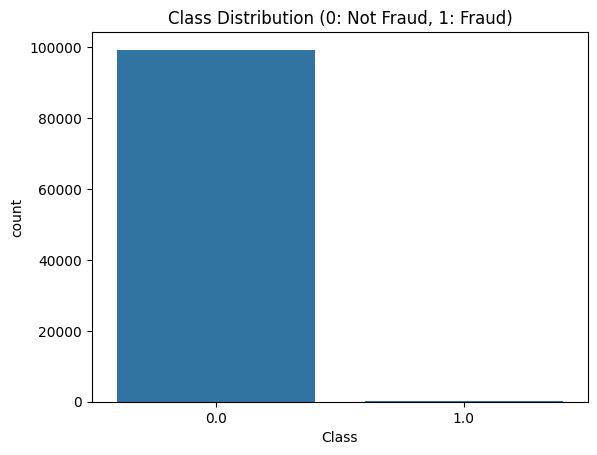

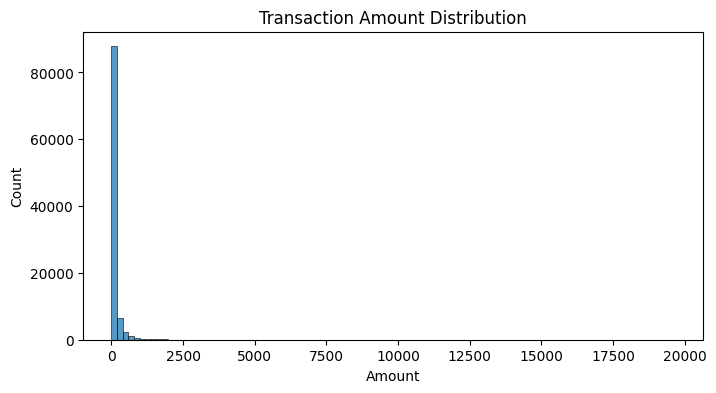

In [3]:
# Class imbalance
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.show()

# Transaction Amount
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=100)
plt.title('Transaction Amount Distribution')
plt.show()


## 4. Data Preprocessing

We'll scale the 'Amount' feature and drop 'Time' as it's not useful.


In [4]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time'], axis=1)

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']


## 5. Handling Imbalanced Data

We apply SMOTE to balance the class distribution in the training set.


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Class
0.0    79429
1.0      168
Name: count, dtype: int64
After SMOTE: Class
0.0    79429
1.0    79429
Name: count, dtype: int64


## 6. Logistic Regression Model

We train a Logistic Regression model on the balanced training data.


In [7]:
# Drop rows with missing values in X_test
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Align target with dropped rows


In [8]:
from sklearn.impute import SimpleImputer

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)


In [9]:
log_preds = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, log_preds))


Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     19845
         1.0       0.10      0.89      0.18        54

    accuracy                           0.98     19899
   macro avg       0.55      0.93      0.59     19899
weighted avg       1.00      0.98      0.99     19899



## 7. Random Forest Model

Now we train a Random Forest model and compare its performance.


In [12]:
# Step 1: Use only 30% of the SMOTE-resampled data
X_small = X_train_res.sample(frac=0.3, random_state=42)
y_small = y_train_res.loc[X_small.index]

# Step 2: Use fewer trees and parallel CPU usage
rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
rf_model.fit(X_small, y_small)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [13]:
rf_preds = rf_model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19845
         1.0       0.85      0.81      0.83        54

    accuracy                           1.00     19899
   macro avg       0.92      0.91      0.91     19899
weighted avg       1.00      1.00      1.00     19899



## 8. Confusion Matrices

Visualizing confusion matrices for both models.


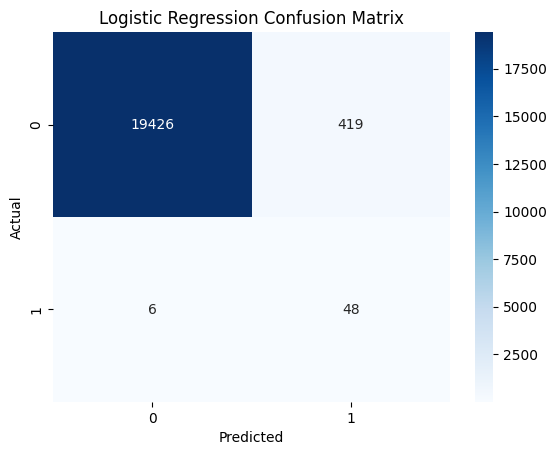

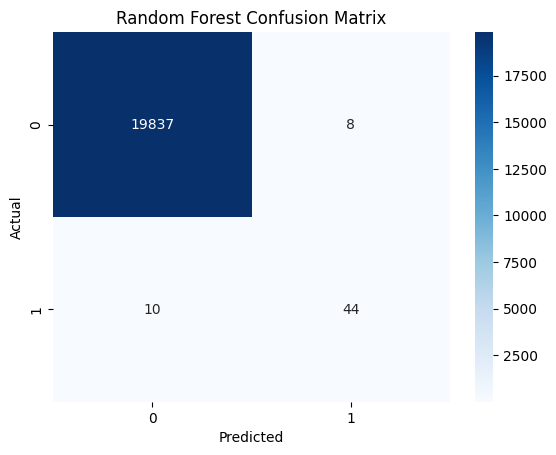

In [15]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, log_preds, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")


## 9. ROC Curve and AUC Score

Evaluate model performance with ROC-AUC metric.


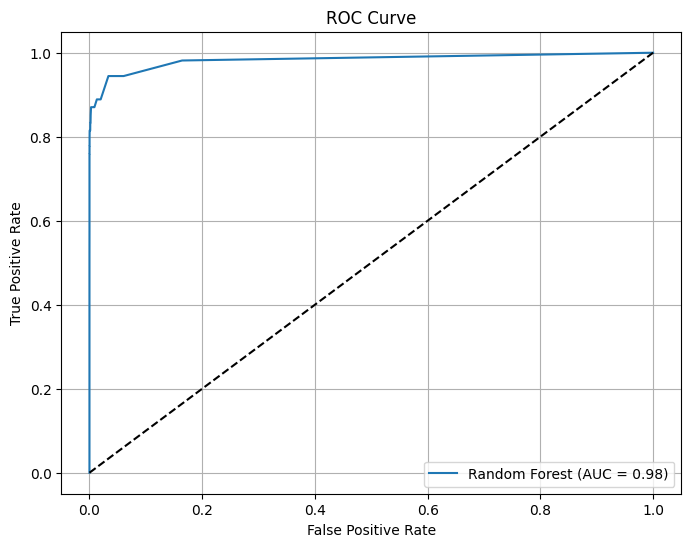

In [16]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
auc_score = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


## 10. Conclusion and Insights

- The dataset is highly imbalanced, requiring SMOTE to balance classes.
- Random Forest performed slightly better than Logistic Regression.
- ROC-AUC provides a better metric for imbalanced classification.
- The project demonstrates handling real-world fraud detection scenarios with imbalanced data.
